Bienvenidos a la primera parte del proyecto *Food analytics* en la cual creacre un modelo de red neuronal profunda, con varias capas de convolucion la cual tendra el objetivo de clasificar imagenes de comidas a color.

Obtendremos los datos, los cuales nos proporciona la academia INOVE.

In [43]:
# Descargar el dataset
import gdown
import os
if os.access('10_food_classes_all_data', os.F_OK) is False:
    if os.access('10_food_classes_all_data.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1ltCRzJhGcmJITYq7o8XyrSAezXPYPzBX'
        output = '10_food_classes_all_data.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q 10_food_classes_all_data.zip
else:
    print("El archivo ya se encuentra descargado")

El archivo ya se encuentra descargado


Mediante ImageDataGenerator crearemos un generador de imagenes por baches y tambien le aplicaremos un reescalado y reestructuracion.

In [44]:
#Obtenemos las rutas de las imagenes de entrenamiento y validacion
train_dir = "10_food_classes_all_data/train/"
valid_dir = "10_food_classes_all_data/test/"

In [45]:
#importamos ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Realizamos un reescalado
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
#Marcamos la ruta de las imagenes, el tipo de formato que las queremos, los lotes y el tipo de etiquetas
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(200, 200),
                                               batch_size=20,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [47]:
valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               target_size=(200, 200),
                                               batch_size=20,
                                               class_mode='categorical')

Found 2500 images belonging to 10 classes.


Luego de obetener y normalizar los datos pasaremos a la creacion de nuestra red neuronal comvolucional.

In [48]:
#Importamos las librerias necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [49]:
#Instanciamos el modelo con la clase Sequential
food_model = Sequential()

In [50]:
#comenzaremos a preparar las capaz convolucionales
food_model.add(Conv2D(filters=8, kernel_size=(4, 4), strides=1, padding='same', activation='relu', input_shape=(200,200,3)))
food_model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

food_model.add(Conv2D(filters=16, kernel_size=(4, 4), strides=1, padding='same', activation='relu'))
food_model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

In [51]:
#Agregamos una capa Flatten
food_model.add(Flatten())

In [52]:
#Ingresamos las capaz neuronales
food_model.add(Dense(units=64, activation='relu'))
food_model.add(Dropout(0.2))

food_model.add(Dense(units=64, activation='relu'))
food_model.add(Dropout(0.2))

In [53]:
#Ingresamos la capa de salida
food_model.add(Dense(units=10, activation='softmax'))

In [54]:
#copilamos el modelo
food_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
#Observamos como esta compuesto el modelo
food_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 8)       392       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 16)      2064      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 40000)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

Una vez creado el modelo, lo ponemos a entrenar con las imagenes que obtuvimos antes.

In [56]:
#definimos los steps_per_epoch
train_steps = train_data.samples // train_data.batch_size
validation_steps = valid_data.samples // valid_data.batch_size

In [57]:
history_food = food_model.fit(train_data, steps_per_epoch=train_steps, validation_data=valid_data, validation_steps=validation_steps, epochs=10)

Epoch 1/10
375/375 [==============================] - 215s 569ms/step - loss: 2.2581 - accuracy: 0.1415 - val_loss: 2.1918 - val_accuracy: 0.1672
Epoch 2/10
375/375 [==============================] - 209s 557ms/step - loss: 2.1824 - accuracy: 0.1785 - val_loss: 2.1304 - val_accuracy: 0.2180
Epoch 3/10
375/375 [==============================] - 211s 563ms/step - loss: 2.1033 - accuracy: 0.2251 - val_loss: 2.0669 - val_accuracy: 0.2668
Epoch 4/10
375/375 [==============================] - 208s 556ms/step - loss: 1.9676 - accuracy: 0.2987 - val_loss: 2.0268 - val_accuracy: 0.2920
Epoch 5/10
375/375 [==============================] - 211s 562ms/step - loss: 1.7655 - accuracy: 0.3628 - val_loss: 1.9756 - val_accuracy: 0.3164
Epoch 6/10
375/375 [==============================] - 211s 562ms/step - loss: 1.5832 - accuracy: 0.4287 - val_loss: 1.9952 - val_accuracy: 0.3120
Epoch 7/10
375/375 [==============================] - 209s 557ms/step - loss: 1.4156 - accuracy: 0.4925 - val_loss: 2.0715 -

Veamos la relacion del accuracy y val_accuracy mediante un grafico de lineas

In [58]:
#Importamos las librerias
import matplotlib.pyplot as plt
import seaborn as sns

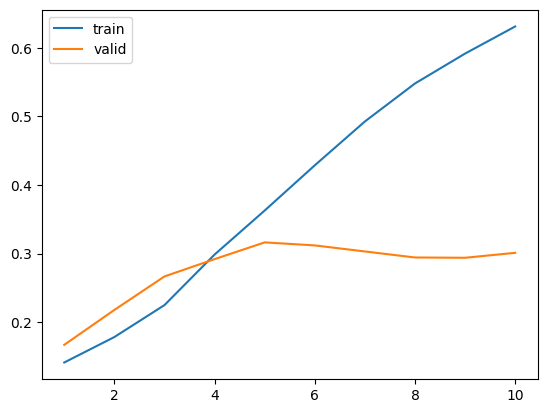

In [59]:
epoch_count = range(1,11)
sns.lineplot(x=epoch_count,  y=history_food.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history_food.history['val_accuracy'], label='valid')
plt.show()

Ahora realizaremos unas pruebas con imagenes que recopile de comida
¿Podra el modelo acertar la mayoria?

In [60]:
#Descargamos la carpeta para realizar el test
if os.access('test_food.zip', os.F_OK) is False:
    if os.access('test_food.zip', os.F_OK) is False:
        url = 'https://drive.google.com/uc?id=1AZjgemd5MIj0SkIwpZLXydK8e3HmWvVO'
        output = '10_food_classes_all_data.zip'
        gdown.download(url, output, quiet=False)
    !unzip -q 10_food_classes_all_data.zip
else:
    print("El archivo ya se encuentra descargado")

Saving test_food.zip to test_food (1).zip


In [ ]:
#tomamos la ruta test_food
test_dir = "/test_food"

In [62]:
#instanciamos la variables y realizamos el mismo escalado
test_datagen = ImageDataGenerator(rescale=1./255)

In [81]:
#Realizamos el mismo procedimiento de datos

test_gen = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(200, 200),
                                               batch_size=20,
                                               class_mode='categorical',
                                                shuffle = False)

Found 10 images belonging to 10 classes.


In [82]:
#Evaluamos al modelo
food_model.evaluate(test_gen)

1/1 [==============================] - 0s 222ms/step - loss: 2.3222 - accuracy: 0.4000


[2.3221592903137207, 0.4000000059604645]

In [83]:
#Realicemos la prediccion
y_pred = food_model.predict(test_gen)

1/1 [==============================] - 0s 217ms/step


In [84]:
#Importamos Numpy
import numpy as np

#Obtenemos las clases predichas
y_pred = np.argmax(y_pred, axis=1)

In [85]:
#Obtenemos las clases verdaderas
y_test = test_gen.classes

In [86]:
#Importamos la matriz de confusion y la matriz de confusion display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Realizamos las matrices
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)

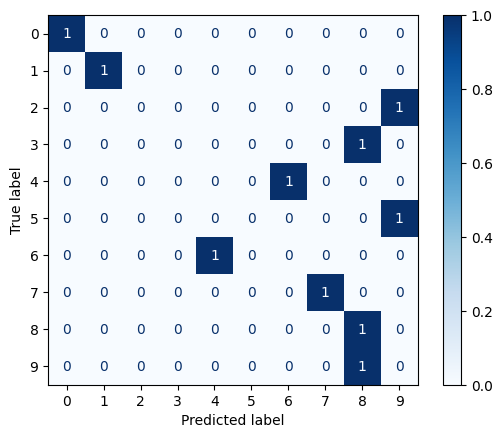

In [89]:
cmd.plot(cmap=plt.cm.Blues)
plt.show()


Acontinuacion mostrare las imagenes con sus clases, veamos bien en cuales comida se equivocó el modelo.

In [91]:
#Obtenemos los nombres de las clases
class_names = list(test_gen.class_indices.keys())

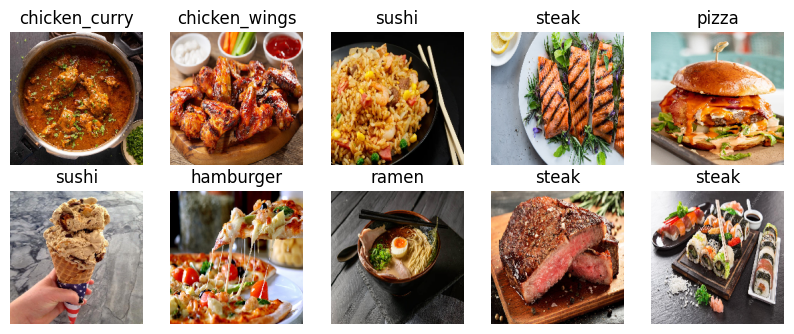

In [94]:
fig = plt.figure(figsize = (10,10))
for i in range(len(class_names)):
    #obtenemos la imagen
    img = test_gen.next()[0]
    #obtenemos la clase
    clas = y_pred[i]
    #normalizamos la clase
    clas = class_names[clas]

    #creamos nuestra imagen
    fig.add_subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.title(clas)
    plt.axis('off')
plt.show()

Aqui vemos que en este caso el modelo no fue muy eficiente, pero en cuanto cantidad calidad podria decirse que paso la prueba, pues el modelo es super sencillo y nada complejo.